## Decision Tree
Classifiction Model중에서 많이 사용하는 Model중 하나이다.  
**Decision Tree는 Classification Model에서 가장 기본적으로 사용되는 Model로서 Model을 구축하기 위한 Complexity도 낮고, 또한 Visualization하였을 경우 쉽게 해석할 수 있는 Model이므로 많이 사용된다. 특히, ML뿐만 아니라 DL에서도 많이 사용되는 Entropy를 Base로서 Model을 구성하게 된다. Unsupervised Learning방법인 K-Means와 많이 비교된다.(K-means는 후의 Post에 개제)**

**Decision Tree의 자세한 내용의 링크는 다음과 같다.**
- <a href="https://wjddyd66.github.io/machine%20learning/Theory(2)Fundamentals-of-Machine-Learning/#22-decision-tree">Decision Tree</a>
- <a href="https://wjddyd66.github.io/machine%20learning/Theory(8)K-Means-Clustering-and-Gaussian-Mixture-Model/">K-Means vs Decision Tree</a>

## Setup
실제 Project를 진행하기 앞서 사용하고자 하는 Library확인 및 원하는 Version(Python 언어 특성상 Version에 많이 의존하게 된다.)이 설치되어있는지 확인하는 작업이다.  
또한, 자주 사용하게 될 Function이나, Directory를 지정하기도 한다.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Theory
먼저 Decision Tree의 Algorithm을 살펴보면, 다음과 같다.

**Algorithm**
1. A <- the best decision attribute for next node
2. Assign A as decision attribute for node
3. For each value of A, create new descendant of node
4. Sort training examples to leaf nodes
5. If training examples perfectly classified, Then STOP, Else iterate over new leaf nodes

즉, Root를 기준으로 Child를 Expand하여 생성하였을 때, Expand에서 모든 경우에 대해서 Classification이 잘 되도록 Node를 늘려가는 형식이라는 것 이다. 그렇다면 Node를 늘리는 경우, 어떻게 Node를 구성해야 하는지 평가하는 Metric이 존재해야 하고, 이러한 Metric을 **Inpurity**를 통하여 비교할 수 있다.

**Inpurity**
- Entropy: <span>$i(N) = -\sum_{j}P(w_j)log_2P(w_j)$</span>
- Variance: <span>$i(N) = P(w_1)P(w_2)$</span>
- Gini: <span>$i(N) = -\sum_{i \neq j}P(w_i)P(w_j)=\frac{1}{2}[1-\sum_j P^2(w_j)]$</span>
- Misclassification: <span>$i(N) = 1-max_j P(w_j)$</span>

<img src="http://i.imgur.com/n3MVwHW.png" width="500px" title="source: imgur.com">

기본적으로 Gini or Entorpy로서 Decision Tree의 어떤 Node가 더 적합한지 평가할 수 있다. 
이러한 Entorpy를 사용하여 Information Gain을 예측하게 된다.  

**Information Gain**  
<p>$$Ent(S) = -p_{+}log_2p_{+} - p_{-}log_2p_{-}$$</p>
<p>$$Gain(S,A) = Ent(S) - \sum_{v \in Values(A)} \frac{|S_v|}{S} Ent(S_v)$$</p>

위의 <a href="https://wjddyd66.github.io/machine%20learning/Theory(2)Fundamentals-of-Machine-Learning/#23-entropy-and-information-gain">Entropy와 Information Gain</a>은 앞으로도 많이 사용하는 개념이므로 알아가야 한다.  

Decision Tree는 이렇게 다양한 Node를 생성하게 되고, 이 중 Information Gain이 높은 Node를 선택하여 Decision Tree를 구성하게 된다. 이렇게 늘려가는 과정을 ID3 Algorithm이라고 표현하고 다음과 같이 나타낼 수 있다.

**The ID3 Algorithm**  
Given inputs: Training Set S, Feature Set Z

1. If all examples are positive (or negative), return the leaf node with label “Positive” (or “Negative”)
2. Find the feature X ∈ Z with highest information gain on the Training Set
3. For each possible value of X, call it Xi, add a branch that tests for X = Xi. Let the set of examples with X = Xi be SXi. If S_Xi is empty then add a leaf node to the branch with the label set to the most common label in S. Otherwise, create a subtree beneath the branch by calling ID3 with training set S_Xi and feature set Z \{X}

위에서 설명한 Algorithm과 다른 것이 없지만, Node의 평가 Metric으로서 Information Gain을 사용한다는 것을 알 수 있다.  

## Sklearn Decision Tree
**Iris Dataset & Sklearn Decision Tree**

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Prepare Iris Dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

# Sklearn Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**Visualization DecisionTree**

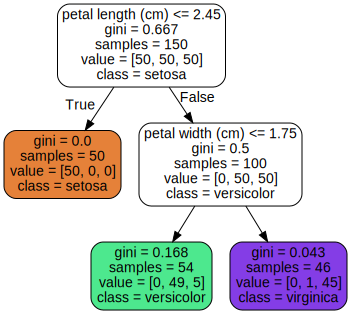

In [7]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

위의 결과를 살펴보면, **Setosa, Versicolor, Virginica를 Classification하기 위하여 petal length and width의 2개의 Feature를 사용하였고, 가장 차이가 많이 나는 Feature는 Petal Length이다.**  

Pental width <= 2.45이면 setosa로 판별하여도 100%의 결과를 얻을 수 있다.

다음과 같이 어떤 Feature가 중요하고 이로인하여 Classification의 결과를 쉽게 이해할 수 있는 것이 Decision Tree의 장점이다.

**Visualization Result of Decision Tree**

Saving figure decision_tree_decision_boundaries_plot


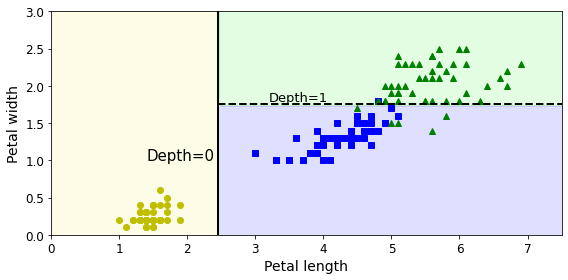

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    # Classification for all areas (Penta length: 0~7.5, Pental width: 0~3)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    # Classification for real iris data
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    
    # Legend
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# Visualization
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

**Classification Probability**

In [15]:
# Probability
p = tree_clf.predict_proba([[5, 1.5]])

# Classification
c = tree_clf.predict([[5, 1.5]])

print('Petal length: 5, Petal width: 1.5')
print('Probability of Setosa[0]: ',p[0,0])
print('Probability of Versicolor[1]: ',p[0,1])
print('Probability of Virginica[2]: ',p[0,2])
print('Classification of Decision Tree: ',c)

Petal length: 5, Petal width: 1.5
Probability of Setosa[0]:  0.0
Probability of Versicolor[1]:  0.9074074074074074
Probability of Virginica[2]:  0.09259259259259259
Classification of Decision Tree:  [1]


**Overfitting of Decision Tree**

하지만 **Algorithm이나 ID3 Algorithm은 모든 Data에 대하여 Classification을 하는 것을 목표로 하고 있다. 이렇게 되는 경우 Node가 많아지게 되고 Model의 Complexity가 늘어나게 되어, Overfitting이 발생 될 확률이 높아지게 된다.** (<a href="https://wjddyd66.github.io/machine%20learning/Theory(6)Training-Testing-and-Regularization/#61-overfitting-and-underfitting">Bias and Variance Trade off</a>)  
위와 링크처럼 Overfitting을 줄이기 위해서는 Decision Tree의 Complexity를 줄여야한다. 따라서 **Decision Tree의 Leaf를 제한하는 방법(Purning)으로서 Overfitting을 예방**하고 있다.

아래 예시는 Decision Tree의 Depth를 제한하지 않았을 경우와 Depth를 4로서 제한하였을 경우이다.

Saving figure min_samples_leaf_plot


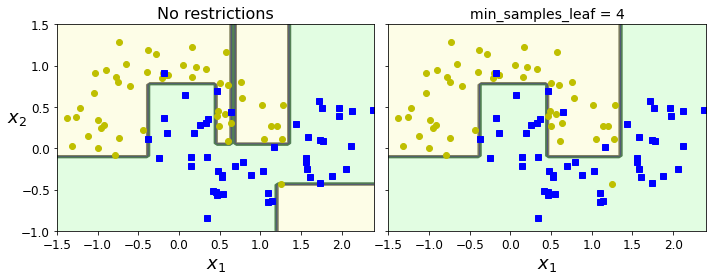

In [16]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

**Sensitivity to training set details**  
Iris Dataset을 Classification하는 Decision Tree와 Depth를 4로 제한한 Decision Tree등 살펴보게 되면, **특정값의 Threshold로서 Classification하므로 계단 모양으로 구별하는 것을 알 수 있다.**  

이러한 Decision Tree의 특성때문에 Data에 대해 민감하게 반응할 수 없는 단점을 가지게 된다.  
아래 Code는 Original Data는 2개의 Dimension으로서 잘 구별하는 것을 살펴볼 수 있으나, 45도 회전을 하게 된다면, Decision Tree로서 Classification하기 위하여 많은 Decision을 정해야 하는 것을 알 수 있다.

Saving figure sensitivity_to_rotation_plot


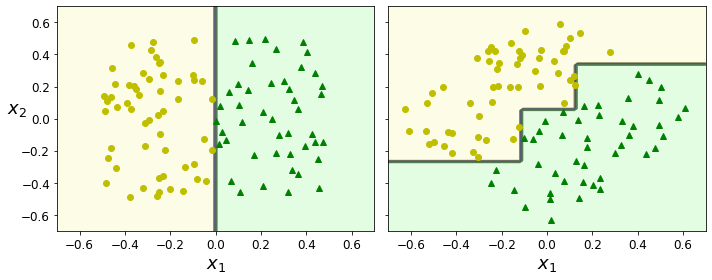

In [17]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

이러한 단점을 해결하기 위하여, 실제 많이 사용하는 Dataset의 경우에는 PCA(후의 Post)으로서 Dimension Reduction및, 회전변환을 하여 Dataset을 구축한다.

## Regression Trees
Decision Tree를 사용하여 Linear Regression과 같은 결과를 얻을 수 있다.  
**Decision Tree의 기본 Metric인 Information Gain을 사용하는 것이 아니라, Linear Regression과 마찬가지로 MSE로 구성하게 되면 같은 효과를 얻을 수 있다.**

Saving figure tree_regression_regularization_plot


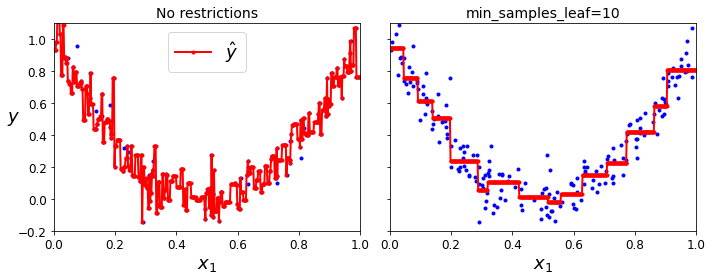

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Quadratic training set + noise
np.random.seed(42)
m = 200
# Dataset
X = np.random.rand(m, 1)
# Label
y = 4 * (X - 0.5) ** 2
# Label + Noise
y = y + np.random.randn(m, 1) / 10

# Decision Tree Regression 1: No restrictions
tree_reg1 = DecisionTreeRegressor(random_state=42)
# Decision Tree Regression 2: Max Depth=10
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
# Training
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# Prediction
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

# Visualization
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()